# Sentiment Analysis of IIT Patna Movie Reviews (in Hindi) using One shot learning

#### Dataset - https://github.com/AI4Bharat/indicnlp_corpus

We use a One shot learning based approach in order to predict sentiments of Movie reviews in this dataset

## From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data_train = pd.read_csv('/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-train.csv')
data_train.head()

,sentiment,text
0,positive,’उड़ान’ से विक्रमादित्य\nमोटवाने\nने अच्छे सिन...
1,neutral,फिल्म में गानों के दृश्य में अनुष्का को माइक क...
2,neutral,फांसी चढ़ने से पहले वह पाकिस्तान के सदर से खास...
3,positive,राज कुमार हिरानी ने इस मूवी में भी अपने डायरेक...
4,positive,इन फुकरों से आप पहले भी मिल चुके हैं और आपने इ...


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-test.csv')
data_test.head()

,sentiment,text
0,negative,"निर्माता :\nफरहान अख्तर, रितेश सिधवानी\n\nनिर्..."
1,positive,असमर्पित रिश्ते में यकीन रखने वाले दोनों मौज-म...
2,neutral,"बेवकूफियां को हबीब फैज़ल ने लिखा है, जिनका नाम..."
3,neutral,तब वह मोटी थी और जेरी ने उस पर ध्यान नहीं दिय...
4,positive,'तेवर' में निर्देशक अमित रवींद्रनाथ शर्मा ने अ...


In [ ]:
data_val = pd.read_csv('/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-valid.csv')
data_val.head()

,sentiment,text
0,neutral,निर्माता :\nआदित्य चोपड़ा\n\nनिर्देशक :\nहबीब ...
1,positive,इस कसौटी पर करण काफी हद तक खरे भी उतरे हैं।
2,positive,"छोटे शहर की गालियां, छतें और विहंगम दृश्य मोहक..."
3,positive,मनीष और जिशान का काम भी लोगों को याद रहेगा।
4,positive,"बैनर :\nएसएलबी फिल्म्स, हरि ॐ एंटरटेनमेंट कंपन..."


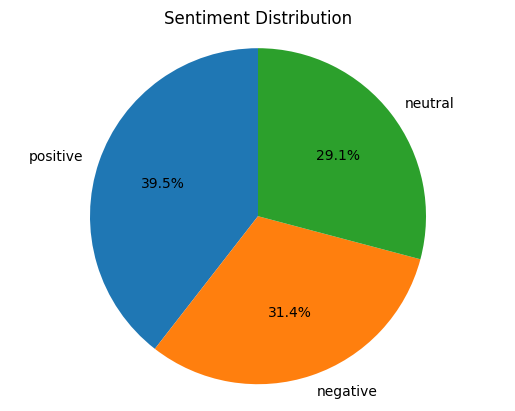

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = data_test['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
_ = plt.axis('equal')

## Data preprocessing

In [ ]:
data_val.isnull().sum()

,0
sentiment,0
text,0


In [ ]:
data_train.shape

(2479, 2)

In [ ]:
data_test.shape

(309, 2)

In [ ]:
data_val.shape

(309, 2)

In [ ]:
import re

def clean_text(text):
    #text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b[a-zA-Z]\b', " ", text)
    text = re.sub(r"<[^>]*>", " ", text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


In [ ]:
text = data_train['text'].apply(clean_text)
# text = data_test['text'].apply(clean_text)
# text = data_val['text'].apply(clean_text)

In [ ]:
text = data_test['text'].apply(clean_text)
text = data_val['text'].apply(clean_text)

In [ ]:
data_train

,sentiment,text
0,positive,’उड़ान’ से विक्रमादित्य\nमोटवाने\nने अच्छे सिन...
1,neutral,फिल्म में गानों के दृश्य में अनुष्का को माइक क...
2,neutral,फांसी चढ़ने से पहले वह पाकिस्तान के सदर से खास...
3,positive,राज कुमार हिरानी ने इस मूवी में भी अपने डायरेक...
4,positive,इन फुकरों से आप पहले भी मिल चुके हैं और आपने इ...
...,...,...
2474,positive,प्रकाश झा ने ऐसी फिल्म के निर्माण से सराहनीय क...
2475,positive,पता चलता है किअभ्यास और एकाग्रता से कलाकार नए ...
2476,neutral,पता चलता है कि वह एक बैंक कर्मचारी की बेटी है।
2477,positive,इस बार तो वे अपनी जमीन के किरदार में थे।


In [ ]:
data_test

,sentiment,text
0,negative,"निर्माता :\nफरहान अख्तर, रितेश सिधवानी\n\nनिर्..."
1,positive,असमर्पित रिश्ते में यकीन रखने वाले दोनों मौज-म...
2,neutral,"बेवकूफियां को हबीब फैज़ल ने लिखा है, जिनका नाम..."
3,neutral,तब वह मोटी थी और जेरी ने उस पर ध्यान नहीं दिय...
4,positive,'तेवर' में निर्देशक अमित रवींद्रनाथ शर्मा ने अ...
...,...,...
304,neutral,बाकी कलाकार साधारण और स्थानपूर्ति के लिए हैं।
305,negative,पिछली कई फिल्मों में स्क्रीन पर दूल्हा बन रहे ...
306,positive,अजीत की भूमिका में आनंद तिवारी सहज हैं।
307,negative,1983 में आई के राघवेन्द्र राव की हिम्मतवाला की...


In [ ]:
data_val

,sentiment,text
0,neutral,निर्माता :\nआदित्य चोपड़ा\n\nनिर्देशक :\nहबीब ...
1,positive,इस कसौटी पर करण काफी हद तक खरे भी उतरे हैं।
2,positive,"छोटे शहर की गालियां, छतें और विहंगम दृश्य मोहक..."
3,positive,मनीष और जिशान का काम भी लोगों को याद रहेगा।
4,positive,"बैनर :\nएसएलबी फिल्म्स, हरि ॐ एंटरटेनमेंट कंपन..."
...,...,...
304,neutral,निर्देशक फुवाद खान ने भारतीय संदर्भ में यहूदी ...
305,positive,तात्पर्य यह कि हिरानी और जोशी की काबिलियत है क...
306,positive,सलमान ने एक्शन के दृश्यों में आवश्यक फुर्ती दि...
307,positive,फुवाद खान ने सलीके से अपनी बात कही है और किसी ...


In [ ]:
data_train['sentiment'].value_counts()

,count
sentiment,
positive,1042
negative,741
neutral,696


In [ ]:
data_train['sentiment'] = data_train['sentiment'].replace({'positive': 1, 'negative': 2, 'neutral': 0})

In [ ]:
data_train

,sentiment,text
0,1,’उड़ान’ से विक्रमादित्य\nमोटवाने\nने अच्छे सिन...
1,0,फिल्म में गानों के दृश्य में अनुष्का को माइक क...
2,0,फांसी चढ़ने से पहले वह पाकिस्तान के सदर से खास...
3,1,राज कुमार हिरानी ने इस मूवी में भी अपने डायरेक...
4,1,इन फुकरों से आप पहले भी मिल चुके हैं और आपने इ...
...,...,...
2474,1,प्रकाश झा ने ऐसी फिल्म के निर्माण से सराहनीय क...
2475,1,पता चलता है किअभ्यास और एकाग्रता से कलाकार नए ...
2476,0,पता चलता है कि वह एक बैंक कर्मचारी की बेटी है।
2477,1,इस बार तो वे अपनी जमीन के किरदार में थे।


In [ ]:
data_test['sentiment'].value_counts()

,count
sentiment,
positive,122
negative,97
neutral,90


In [ ]:
data_test['sentiment'] = data_test['sentiment'].replace({'positive': 1, 'negative': 2, 'neutral': 0})

In [ ]:
data_test

,sentiment,text
0,2,"निर्माता :\nफरहान अख्तर, रितेश सिधवानी\n\nनिर्..."
1,1,असमर्पित रिश्ते में यकीन रखने वाले दोनों मौज-म...
2,0,"बेवकूफियां को हबीब फैज़ल ने लिखा है, जिनका नाम..."
3,0,तब वह मोटी थी और जेरी ने उस पर ध्यान नहीं दिय...
4,1,'तेवर' में निर्देशक अमित रवींद्रनाथ शर्मा ने अ...
...,...,...
304,0,बाकी कलाकार साधारण और स्थानपूर्ति के लिए हैं।
305,2,पिछली कई फिल्मों में स्क्रीन पर दूल्हा बन रहे ...
306,1,अजीत की भूमिका में आनंद तिवारी सहज हैं।
307,2,1983 में आई के राघवेन्द्र राव की हिम्मतवाला की...


In [ ]:
data_val['sentiment'].value_counts()

,count
sentiment,
positive,121
negative,108
neutral,80


In [ ]:
data_val['sentiment'] = data_val['sentiment'].replace({'positive': 1, 'negative': 2, 'neutral': 0})

In [ ]:
data_val

,sentiment,text
0,0,निर्माता :\nआदित्य चोपड़ा\n\nनिर्देशक :\nहबीब ...
1,1,इस कसौटी पर करण काफी हद तक खरे भी उतरे हैं।
2,1,"छोटे शहर की गालियां, छतें और विहंगम दृश्य मोहक..."
3,1,मनीष और जिशान का काम भी लोगों को याद रहेगा।
4,1,"बैनर :\nएसएलबी फिल्म्स, हरि ॐ एंटरटेनमेंट कंपन..."
...,...,...
304,0,निर्देशक फुवाद खान ने भारतीय संदर्भ में यहूदी ...
305,1,तात्पर्य यह कि हिरानी और जोशी की काबिलियत है क...
306,1,सलमान ने एक्शन के दृश्यों में आवश्यक फुर्ती दि...
307,1,फुवाद खान ने सलीके से अपनी बात कही है और किसी ...


## One shot Learning - Siamese Network

This approach is used when we have lesser training data, but we want to use this less data to achieve desired results and make sentiment predictions. In this project, we use the One-Shot learning Approach

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.python.keras.models import Model
from keras.layers import BatchNormalization
from tensorflow.python.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.python.keras.layers import Concatenate
from keras.layers import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import Adam
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
data_train

,sentiment,text
0,1,’उड़ान’ से विक्रमादित्य\nमोटवाने\nने अच्छे सिन...
1,0,फिल्म में गानों के दृश्य में अनुष्का को माइक क...
2,0,फांसी चढ़ने से पहले वह पाकिस्तान के सदर से खास...
3,1,राज कुमार हिरानी ने इस मूवी में भी अपने डायरेक...
4,1,इन फुकरों से आप पहले भी मिल चुके हैं और आपने इ...
...,...,...
2474,1,प्रकाश झा ने ऐसी फिल्म के निर्माण से सराहनीय क...
2475,1,पता चलता है किअभ्यास और एकाग्रता से कलाकार नए ...
2476,0,पता चलता है कि वह एक बैंक कर्मचारी की बेटी है।
2477,1,इस बार तो वे अपनी जमीन के किरदार में थे।


In [ ]:
data_test

,sentiment,text
0,2,"निर्माता :\nफरहान अख्तर, रितेश सिधवानी\n\nनिर्..."
1,1,असमर्पित रिश्ते में यकीन रखने वाले दोनों मौज-म...
2,0,"बेवकूफियां को हबीब फैज़ल ने लिखा है, जिनका नाम..."
3,0,तब वह मोटी थी और जेरी ने उस पर ध्यान नहीं दिय...
4,1,'तेवर' में निर्देशक अमित रवींद्रनाथ शर्मा ने अ...
...,...,...
304,0,बाकी कलाकार साधारण और स्थानपूर्ति के लिए हैं।
305,2,पिछली कई फिल्मों में स्क्रीन पर दूल्हा बन रहे ...
306,1,अजीत की भूमिका में आनंद तिवारी सहज हैं।
307,2,1983 में आई के राघवेन्द्र राव की हिम्मतवाला की...


In [ ]:
data_val

,sentiment,text
0,0,निर्माता :\nआदित्य चोपड़ा\n\nनिर्देशक :\nहबीब ...
1,1,इस कसौटी पर करण काफी हद तक खरे भी उतरे हैं।
2,1,"छोटे शहर की गालियां, छतें और विहंगम दृश्य मोहक..."
3,1,मनीष और जिशान का काम भी लोगों को याद रहेगा।
4,1,"बैनर :\nएसएलबी फिल्म्स, हरि ॐ एंटरटेनमेंट कंपन..."
...,...,...
304,0,निर्देशक फुवाद खान ने भारतीय संदर्भ में यहूदी ...
305,1,तात्पर्य यह कि हिरानी और जोशी की काबिलियत है क...
306,1,सलमान ने एक्शन के दृश्यों में आवश्यक फुर्ती दि...
307,1,फुवाद खान ने सलीके से अपनी बात कही है और किसी ...


We now define the parameters

In [ ]:
max_voc = 20000
max_len = 100
embedding_dim = 128

In [ ]:
tokenizer = Tokenizer(num_words = max_voc)
tokenizer.fit_on_texts(data_train['text'].tolist())
word_idx = tokenizer.word_index

In [ ]:
train_texts = data_train['text']
train_labels = np.array(data_train['sentiment'])

In [ ]:
test_texts = data_test['text']
test_labels = np.array(data_test['sentiment'])

In [ ]:
val_texts = data_val['text']
val_labels = np.array(data_val['sentiment'])

In [ ]:
def make_pairs(texts, labels):
    pairs = []
    pair_labels = []

    num_classes = len(set(labels))
    class_indices = [np.where(labels == i)[0] for i in range(num_classes)]

    for idx1 in range(len(texts)):
        current_text = texts[idx1]
        label1 = labels[idx1]

        idx2 = np.random.choice(class_indices[label1])
        pos_text = texts[idx2]
        pairs += [[current_text, pos_text]]
        pair_labels += [1]

        neg_label = np.random.choice(list(set(range(num_classes)) - set([label1])))
        idx2 = np.random.choice(class_indices[neg_label])
        neg_text = texts[idx2]
        pairs += [[current_text, neg_text]]
        pair_labels += [0]

    return np.array(pairs), np.array(pair_labels)

In [ ]:
train_pairs, train_pair_labels = make_pairs(train_texts, train_labels)
test_pairs, test_pair_labels = make_pairs(test_texts, test_labels)
val_pairs, val_pair_labels = make_pairs(val_texts, val_labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Lambda, Bidirectional
from tensorflow.keras.models import Model

We now define the base LSTM network

In [ ]:
def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Embedding(max_voc, embedding_dim, input_length=max_len)(input)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(LSTM(128))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

In [ ]:
input_shape = (max_len,)
base_network = create_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Use L2/euclidean instead of l1_distance

In [ ]:
def l1_distance(vectors):
  x,y = vectors
  return tf.keras.backend.abs(x - y)

In [ ]:
distance = Lambda(l1_distance, output_shape=(128,))([processed_a, processed_b])
outputs = Dense(1, activation='sigmoid')(distance)

In [ ]:
model = Model([input_a, input_b], outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 128)            │      3,316,096 │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 128)            │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │            129 │ lambda[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,316,225 (12.65 MB)

 Trainable params: 3,316,225 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_texts_1 = np.array([pair[0] for pair in train_pairs])
train_texts_2 = np.array([pair[1] for pair in train_pairs])

test_texts_1 = np.array([pair[0] for pair in test_pairs])
test_texts_2 = np.array([pair[1] for pair in test_pairs])

val_texts_1 = np.array([pair[0] for pair in val_pairs])
val_texts_2 = np.array([pair[1] for pair in val_pairs])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100)

In [ ]:
train_vectors_1 = vectorizer.fit_transform(train_texts_1)
train_vectors_2 = vectorizer.transform(train_texts_2)

test_vectors_1 = vectorizer.transform(test_texts_1)
test_vectors_2 = vectorizer.transform(test_texts_2)

val_vectors_1 = vectorizer.transform(val_texts_1)
val_vectors_2 = vectorizer.transform(val_texts_2)

In [ ]:
history = model.fit([train_vectors_1.toarray(), train_vectors_2.toarray()], train_pair_labels,
                    batch_size=64,
                    epochs=100,
                    validation_data=([val_vectors_1.toarray(), val_vectors_2.toarray()], val_pair_labels))

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.4932 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.4951 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5025 - loss: 0.6937 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5082 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.4870 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4861 - loss: 0.7017 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.4954 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5015 - loss: 0.6956 - val_accuracy: 

After

In [ ]:
results = model.evaluate([test_vectors_1.toarray(), test_vectors_2.toarray()], test_pair_labels)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 0.6931
Test Loss: 0.6931498050689697, Test Accuracy: 0.5


In [ ]:
def predict_sentiment(sentence, support_texts, support_labels, tokenizer, model):

    sentence_seq = tokenizer.texts_to_sequences([sentence])
    sentence_seq = pad_sequences(sentence_seq, maxlen=100)

    similarities = []
    sentiments = []

    for i in range(len(support_texts)):
        support_sentence = support_texts[i:i+1]
        support_sentence_seq = tokenizer.texts_to_sequences(support_sentence)
        support_sentence_seq = pad_sequences(support_sentence_seq, maxlen=100) # Pad the sequence
        similarity = model.predict([sentence_seq, support_sentence_seq], verbose=0)[0][0]
        similarities.append(similarity)
        sentiments.append(support_labels[i])

    sentiment_score = np.dot(similarities, sentiments) / sum(similarities)
    return 'Positive' if sentiment_score > 0.5 else 'Negative'

# prediction of classes based on whatever is there in user_sentence

from tensorflow.keras.preprocessing.sequence import pad_sequences


user_sentence = "તે એક વાહિયાત જાતિવાદી છે"

support_texts = train_texts[:1000]
support_labels = train_labels[:1000]

predicted_sentiment = predict_sentiment(user_sentence, support_texts, support_labels, tokenizer, model)
print(f'The sentiment of the sentence is: {predicted_sentiment}')


The sentiment of the sentence is: Positive


Before

Data Augmentation  - //TODO

In [ ]:
results = model.evaluate([test_vectors_1.toarray(), test_vectors_2.toarray()], test_pair_labels)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5000 - loss: 0.6932
Test Loss: 0.6931749582290649, Test Accuracy: 0.5


In [ ]:
def predict_sentiment(sentence, support_texts, support_labels, tokenizer, model):

    sentence_seq = tokenizer.texts_to_sequences([sentence])
    sentence_seq = pad_sequences(sentence_seq, maxlen=100)


    similarities = []
    sentiments = []

    for i in range(len(support_texts)):
        support_sentence = support_texts[i:i+1]
        support_sentence_seq = tokenizer.texts_to_sequences(support_sentence)
        support_sentence_seq = pad_sequences(support_sentence_seq, maxlen=100) # Pad the sequence
        similarity = model.predict([sentence_seq, support_sentence_seq], verbose=0)[0][0]
        similarities.append(similarity)
        sentiments.append(support_labels[i])

    sentiment_score = np.dot(similarities, sentiments) / sum(similarities)

    return 'Positive' if sentiment_score > 0.5 else 'Negative'


from tensorflow.keras.preprocessing.sequence import pad_sequences


user_sentence = "यह एक बहुत अच्छी फिल्म है।"

support_texts = train_texts[:1000]
support_labels = train_labels[:1000]

predicted_sentiment = predict_sentiment(user_sentence, support_texts, support_labels, tokenizer, model)
print(f'The sentiment of the sentence is: {predicted_sentiment}')


The sentiment of the sentence is: Positive


### After modification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Lambda, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-test.csv')
data_val = pd.read_csv('/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-valid.csv')

In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b[a-zA-Z]\b', " ", text)
    text = re.sub(r"<[^>]*>", " ", text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

data_train['text'] = data_train['text'].apply(clean_text)
data_test['text'] = data_test['text'].apply(clean_text)
data_val['text'] = data_val['text'].apply(clean_text)

In [ ]:
sentiment_mapping = {'positive': 1, 'negative': 2, 'neutral': 0}
data_train['sentiment'] = data_train['sentiment'].map(sentiment_mapping)
data_test['sentiment'] = data_test['sentiment'].map(sentiment_mapping)
data_val['sentiment'] = data_val['sentiment'].map(sentiment_mapping)

In [ ]:
max_voc = 20000
max_len = 100
embedding_dim = 128

In [ ]:
tokenizer = Tokenizer(num_words=max_voc)
tokenizer.fit_on_texts(data_train['text'].tolist())

In [ ]:
train_texts = data_train['text']
train_labels = np.array(data_train['sentiment'])

test_texts = data_test['text']
test_labels = np.array(data_test['sentiment'])

val_texts = data_val['text']
val_labels = np.array(data_val['sentiment'])


In [ ]:
def make_pairs(texts, labels):
    pairs = []
    pair_labels = []
    num_classes = len(set(labels))
    class_indices = [np.where(labels == i)[0] for i in range(num_classes)]

    for idx1 in range(len(texts)):
        current_text = texts[idx1]
        label1 = labels[idx1]

        idx2 = np.random.choice(class_indices[label1])
        pos_text = texts[idx2]
        pairs.append([current_text, pos_text])
        pair_labels.append(1)

        neg_label = np.random.choice(list(set(range(num_classes)) - set([label1])))
        idx2 = np.random.choice(class_indices[neg_label])
        neg_text = texts[idx2]
        pairs.append([current_text, neg_text])
        pair_labels.append(0)

    return np.array(pairs), np.array(pair_labels)

train_pairs, train_pair_labels = make_pairs(train_texts, train_labels)
test_pairs, test_pair_labels = make_pairs(test_texts, test_labels)
val_pairs, val_pair_labels = make_pairs(val_texts, val_labels)

In [ ]:
def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Embedding(max_voc, embedding_dim, input_length=max_len)(input)
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(LSTM(128))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

In [ ]:
input_shape = (max_len,)
base_network = create_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
def l2_distance(vectors):
    x, y = vectors
    # Compute L2 distance
    euclidean_distance = K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))
    # Divide by 2
    return euclidean_distance / 2.0

# Replace l1_distance with l2_distance
distance = Lambda(l2_distance, output_shape=(1,))([processed_a, processed_b])

# Add a dense layer for the final output
outputs = Dense(1, activation='sigmoid')(distance)

In [ ]:
model = Model([input_a, input_b], outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
train_texts_1 = tokenizer.texts_to_sequences([pair[0] for pair in train_pairs])
train_texts_2 = tokenizer.texts_to_sequences([pair[1] for pair in train_pairs])

test_texts_1 = tokenizer.texts_to_sequences([pair[0] for pair in test_pairs])
test_texts_2 = tokenizer.texts_to_sequences([pair[1] for pair in test_pairs])

val_texts_1 = tokenizer.texts_to_sequences([pair[0] for pair in val_pairs])
val_texts_2 = tokenizer.texts_to_sequences([pair[1] for pair in val_pairs])

train_texts_1 = pad_sequences(train_texts_1, maxlen=max_len)
train_texts_2 = pad_sequences(train_texts_2, maxlen=max_len)

test_texts_1 = pad_sequences(test_texts_1, maxlen=max_len)
test_texts_2 = pad_sequences(test_texts_2, maxlen=max_len)

val_texts_1 = pad_sequences(val_texts_1, maxlen=max_len)
val_texts_2 = pad_sequences(val_texts_2, maxlen=max_len)

In [ ]:
history = model.fit([train_texts_1, train_texts_2], train_pair_labels,
                    batch_size=16,
                    epochs=100,
                    validation_data=([val_texts_1, val_texts_2], val_pair_labels))


Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.5015 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.5012 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5191 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.5121 - loss: 0.6928 - val_accuracy: 0.4919 - val_loss: 0.7007
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.5273 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.4999 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.5155 - loss: nan - val_accuracy: 0.5000 - val_loss: nan
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.4940 - loss: nan - val_accuracy:

In [ ]:
results = model.evaluate([test_texts_1, test_texts_2], test_pair_labels)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: nan
Test Loss: nan, Test Accuracy: 0.5


In [ ]:
def predict_sentiment(sentence, support_texts, support_labels, tokenizer, model):
    sentence_seq = tokenizer.texts_to_sequences([sentence])
    sentence_seq = pad_sequences(sentence_seq, maxlen=max_len)

    similarities = []
    sentiments = []

    for i in range(len(support_texts)):
        support_sentence = support_texts[i:i+1]
        support_sentence_seq = tokenizer.texts_to_sequences(support_sentence)
        support_sentence_seq = pad_sequences(support_sentence_seq, maxlen=max_len)
        similarity = model.predict([sentence_seq, support_sentence_seq], verbose=0)[0][0]
        similarities.append(similarity)
        sentiments.append(support_labels[i])

    sentiment_score = np.dot(similarities, sentiments) / sum(similarities)
    return 'Positive' if sentiment_score > 0.5 else 'Negative'

In [ ]:
user_sentence = "यह एक बहुत अच्छी फिल्म है।"
support_texts = train_texts[:1000]
support_labels = train_labels[:1000]

predicted_sentiment = predict_sentiment(user_sentence, support_texts, support_labels, tokenizer, model)
print(f'The sentiment of the sentence is: {predicted_sentiment}')

The sentiment of the sentence is: Negative


# Sentiment Analysis of IIT Patna Movie Reviews (in Hindi) using Multi-Shot learning

//TODO -
* Multi-shot learning
* kannada model and predict Telugu
* train on a mix of languages

## Using mBERT-Cased to perform sentiment analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
from transformers import BertTokenizer, TFBertModel
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
max_length = 128
num_classes = 3 #This denotes number of classes in Hindi Dataset

In [ ]:
def encode_texts(texts, max_length):
    # Check if 'texts' is a string and convert to a list if necessary
    if isinstance(texts, str):
        texts = [texts]
    return tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')

In [ ]:
def load_dataset(csv_file):
    dataset = pd.read_csv(csv_file)
    texts = dataset['text'].values
    labels = dataset['sentiment'].values
    return texts, labels

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

def create_model(bert_model, num_classes):
    input_ids = Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")
    attention_mask = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.int32))(attention_mask)
    bert_output = bert_model(input_ids=input_ids, attention_mask = attention_mask)[1]
    dropout = Dropout(0.1)(bert_output)
    output = Dense(num_classes, activation='softmax')(dropout)
    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=3, batch_size=32):
    history = model.fit(
        [X_train['input_ids'], X_train['attention_mask']],
        y_train,
        validation_data=([X_val['input_ids'], X_val['attention_mask']], y_val),
        epochs=epochs,
        batch_size=batch_size
    )
    return history

In [ ]:
def map_labels(hindi_labels, tamil_labels):
    label_mapping = {hindi: tamil for hindi, tamil in zip(hindi_labels, tamil_labels)}
    return label_mapping

In [ ]:
train_csv = '/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-train.csv'
valid_csv = '/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-valid.csv'
test_csv = '/content/drive/MyDrive/Dataset_Indian/Hindi/iitp+-movie-reviews/hi/hi-test.csv'

In [ ]:
X_train_text, y_train = load_dataset(train_csv)
X_val_text, y_val = load_dataset(valid_csv)
X_test_text, y_test = load_dataset(test_csv)

In [ ]:
X_train = encode_texts(X_train_text.tolist(), max_length)
X_val = encode_texts(X_val_text.tolist(), max_length)
X_test = encode_texts(X_test_text.tolist(), max_length)

In [ ]:
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train), num_classes=num_classes)
y_val = to_categorical(label_encoder.transform(y_val), num_classes=num_classes)
y_test = to_categorical(label_encoder.transform(y_test), num_classes=num_classes)

In [ ]:
model = create_model(bert_model, num_classes)

ValueError: Exception encountered when calling layer 'tf_bert_model_1' (type TFBertModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_model_1' (type TFBertModel):
  • input_ids=<KerasTensor shape=(None, 128), dtype=int32, sparse=None, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_14>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False